<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p> 
<p><font size="5" color='grey'> <b>
Computer Vision - ResNest 50 - MNIST
</b></font> </br></p> 

---

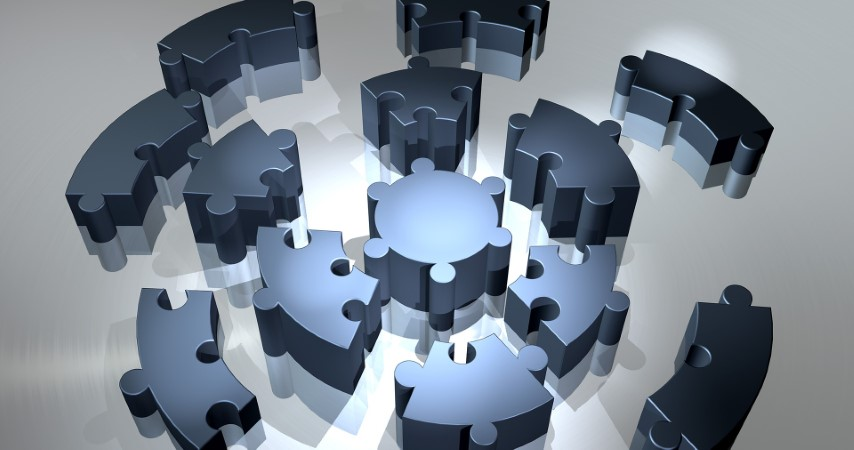

Bild von <a href="https://pixabay.com/de/users/piro4d-2707530/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1713170">PIRO</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1713170">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
---

<p><font color='black' size="5">
Warnungen ausschalten
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---   


Die MNIST-Datenbank ( Modified National Institute of Standards and Technology database ) ist eine große Datenbank mit handgeschriebenen Ziffern, die üblicherweise zum Trainieren verschiedener Bildverarbeitungssysteme verwendet wird. 

Die MNIST-Datenbank mit handgeschriebenen Ziffern hat einen Trainingssatz von 60.000 Beispielen und einen Testsatz von 10.000 Beispielen mit jeweils  28x28 Pixel.







In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(data_train, target_train), (data_test, target_test) = keras.datasets.mnist.load_data()

In [ ]:
data_train.shape, target_train.shape, data_test.shape, target_test.shape

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Numpy
</font></p>

In [ ]:
np.info(data_train)

In [ ]:
np.min(data_train), np.max(data_train)

In [ ]:
np.info(target_train)

In [ ]:
np.min(target_train), np.max(target_test)

# **2 <font color='orange'>|</font> Prepare**
---


<p><font color='black' size="5">
Erweiterung auf 3 Eingangskanäle (bleibt bei monocron)
</font></p>

In [ ]:
data_train = np.stack((data_train,)*3, axis=-1)
data_test = np.stack((data_test,)*3, axis=-1)

In [ ]:
data_train.shape, target_train.shape, data_test.shape, target_test.shape

<p><font color='black' size="5">
Erstellen Matrix binärer Werte der Targetwerte - braucht Keras
</font></p>

In [ ]:
from tensorflow.keras.utils import to_categorical
target_train = to_categorical(target_train)
target_test = to_categorical(target_test)

ImageDataGenerator

Generieren Sie Batches von Tensorbilddaten mit Datenerweiterung in Echtzeit.

[Doku](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

test_generator = ImageDataGenerator(rescale = 1./255)

data_train = train_generator.flow(data_train, target_train, batch_size=512, shuffle=True)
data_test = test_generator.flow(data_test, target_test, batch_size=512, shuffle=False)

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">
Einsatz vortrainierten Modell aus Keras
</font></p>

**ResNest 50**

ResNet-50 ist ein Convolutional Neural Network mit einer Tiefe von 50 Schichten. Man kann eine vortrainierte Version des Netzwerks laden, das mit mehr als einer Million Bildern aus der ImageNet-Datenbank trainiert wurde. Das vortrainierte Netzwerk kann Bilder in 1000 Objektkategorien wie Tastatur, Maus, Bleistift und viele Tiere klassifizieren. Infolgedessen hat das Netzwerk reichhaltige Merkmalsdarstellungen für eine breite Palette von Bildern gelernt. Das Netzwerk hat eine Bildeingabegröße von 224 x 224 (min. 32 x 32). 


[Keras Applications](https://keras.io/api/applications/)

[ResNet 50](https://keras.io/api/applications/resnet/#resnet50-function)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.applications.resnet50 import ResNet50

Ergänzung des vortrainierten Modells ResNet 50 um 2 Layer

In [ ]:
model = Sequential()

# add the pretrained model
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))

# add fully connected layer with output
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

Die ResNet50 Layer werden für Änderungen gesperrt

In [ ]:
model.layers[0].trainable=False

Compile

In [ ]:
model.compile(
    optimizer='Adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

<p><font color='black' size="5">
Einfaches Layer-Diagramm
</font></p>

In [ ]:
model.layers[0].summary()

In [ ]:
model.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model.layers[0], show_shapes=True, show_layer_names=True)
#  to_file='model_plot.png',

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)
#  to_file='model_plot.png',

<p><font color='black' size="5">
Training
</font></p>


In [ ]:
%%time
epoch_ = 15
model.fit(data_train, epochs=epoch_, validation_data=data_test)

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">
Prognose
</font></p>

In [ ]:
target_test_pred = model.predict(data_test)

<p><font color='black' size="5">
Accuracy
</font></p>

In [ ]:
target_test_pred_ = np.array([np.argmax(x) for x in target_pred])

In [ ]:
target_test_ = np.array([np.argmax(x) for x in target_test])

In [ ]:
index = 42
target_test_pred_[index], target_test_[index]

<p><font color='black' size="5">
Confusion Matrix
</font></p>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(target_test_,target_test_pred_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
target_names_ = [str(x) for x in range(0,10)]
print(classification_report(target_test_, target_test_pred_, target_names=target_names_))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test_,target_test_pred_) * 100

# **5 <font color='orange'>|</font> Deploy**
---